In [1]:
%load_ext autoreload
%autoreload 2

In [21]:
import sys
sys.path.append('src/')

import numpy as np
import matplotlib.pyplot as plt

from WADParser import open_wad_file
from WADViewer import WadViewer
from parser_utils import MAPXY_REGEX, EXMY_REGEX, MAPS_ATTRS
from app_utils import img_to_bytes

In [22]:
w = open_wad_file('WADs/DOOM.WAD')

2025-04-15 16:32:25.444 | INFO     | WADParser:__init__:38 - Found a DOOM IWAD.
2025-04-15 16:32:25.447 | INFO     | WADParser:_parse_lumps:117 - Duplicate lump name: DPPISTOL
2025-04-15 16:32:25.447 | INFO     | WADParser:_parse_lumps:117 - Duplicate lump name: DSPISTOL
2025-04-15 16:32:25.448 | INFO     | WADParser:_parse_lumps:117 - Duplicate lump name: DPSHOTGN
2025-04-15 16:32:25.449 | INFO     | WADParser:_parse_lumps:117 - Duplicate lump name: DSSHOTGN
2025-04-15 16:32:25.449 | INFO     | WADParser:_parse_lumps:117 - Duplicate lump name: DPSGCOCK
2025-04-15 16:32:25.450 | INFO     | WADParser:_parse_lumps:117 - Duplicate lump name: DSSGCOCK
2025-04-15 16:32:25.450 | INFO     | WADParser:_parse_lumps:117 - Duplicate lump name: DPSAWUP
2025-04-15 16:32:25.450 | INFO     | WADParser:_parse_lumps:117 - Duplicate lump name: DSSAWUP
2025-04-15 16:32:25.451 | INFO     | WADParser:_parse_lumps:117 - Duplicate lump name: DPSAWIDL
2025-04-15 16:32:25.451 | INFO     | WADParser:_parse_lump

In [23]:
viewer = WadViewer(w)

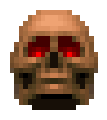

In [7]:
lump = "M_SKULL1"
fig, ax = plt.subplots(1, 1, figsize=(1, 1))
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

ax.axis('off')

viewer.draw_patch(lump, ax=ax)

fig.tight_layout(pad=0)
plt.savefig('media/skull.png', dpi=75, bbox_inches='tight')

In [25]:
w._misc_lumps

{'PLAYPAL': (12, 10752),
 'COLORMAP': (10764, 8704),
 'ENDOOM': (19468, 4000),
 'DEMO1': (23468, 6854),
 'DEMO2': (30324, 9402),
 'DEMO3': (39728, 15466),
 'DEMO4': (55196, 3286),
 'TEXTURE1': (3681592, 9234),
 'TEXTURE2': (3690828, 8036),
 'PNAMES': (3698864, 2812),
 'GENMIDI': (3701676, 11908),
 'DMXGUS': (3713584, 5342),
 'DPPISTOL': (3718928, 31),
 'DSPISTOL': (3718960, 5669),
 'DPSHOTGN': (3724632, 51),
 'DSSHOTGN': (3724684, 9453),
 'DPSGCOCK': (3734140, 38),
 'DSSGCOCK': (3734180, 5906),
 'DPSAWUP': (3740088, 150),
 'DSSAWUP': (3740240, 16297),
 'DPSAWIDL': (3756540, 24),
 'DSSAWIDL': (3756564, 7539),
 'DPSAWFUL': (3764104, 24),
 'DSSAWFUL': (3764128, 18104),
 'DPSAWHIT': (3782232, 29),
 'DSSAWHIT': (3782264, 8018),
 'DPRLAUNC': (3790284, 55),
 'DSRLAUNC': (3790340, 15491),
 'DPRXPLOD': (3805832, 41),
 'DSRXPLOD': (3805876, 14483),
 'DPFIRSHT': (3820360, 51),
 'DSFIRSHT': (3820412, 14748),
 'DPFIRXPL': (3835160, 33),
 'DSFIRXPL': (3835196, 11701),
 'DPPSTART': (3846900, 12),
 'D

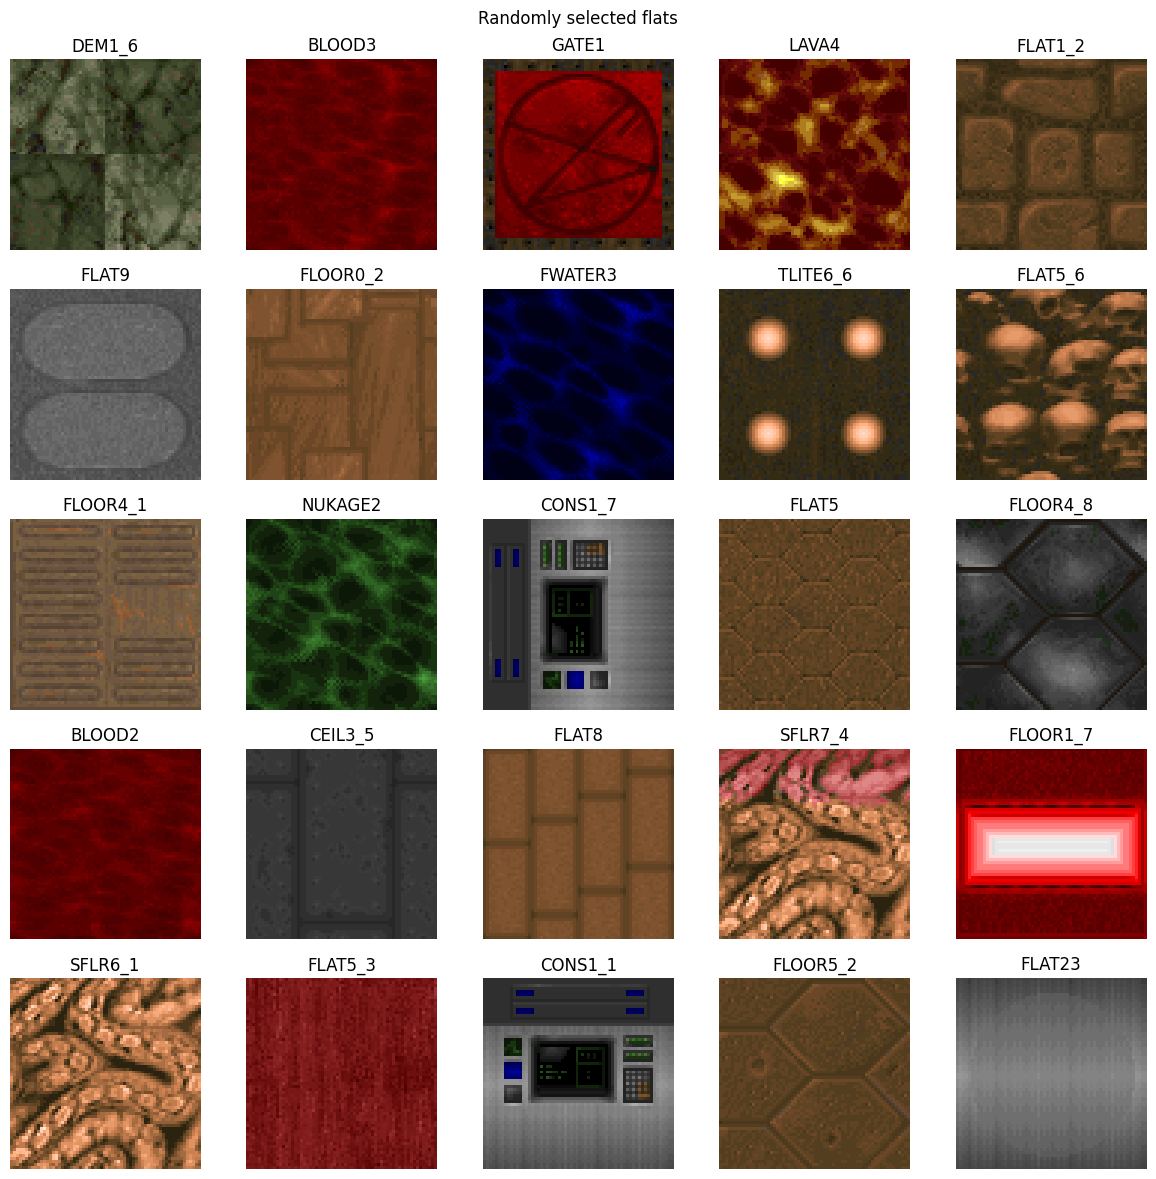

In [9]:
n_flats = 25
fig, ax = plt.subplots(5, 5, figsize=(12, 12))
ax = ax.ravel()

all_flat_names = list(w.flats)
selected_flats = np.random.choice(all_flat_names, size=n_flats, replace=False)

for i, flat_name in enumerate(selected_flats):

    viewer.draw_flat(flat_name, ax=ax[i])
    ax[i].set_title(flat_name)
    ax[i].axis('off')

fig.suptitle('Randomly selected flats')
fig.tight_layout(pad=1.2)

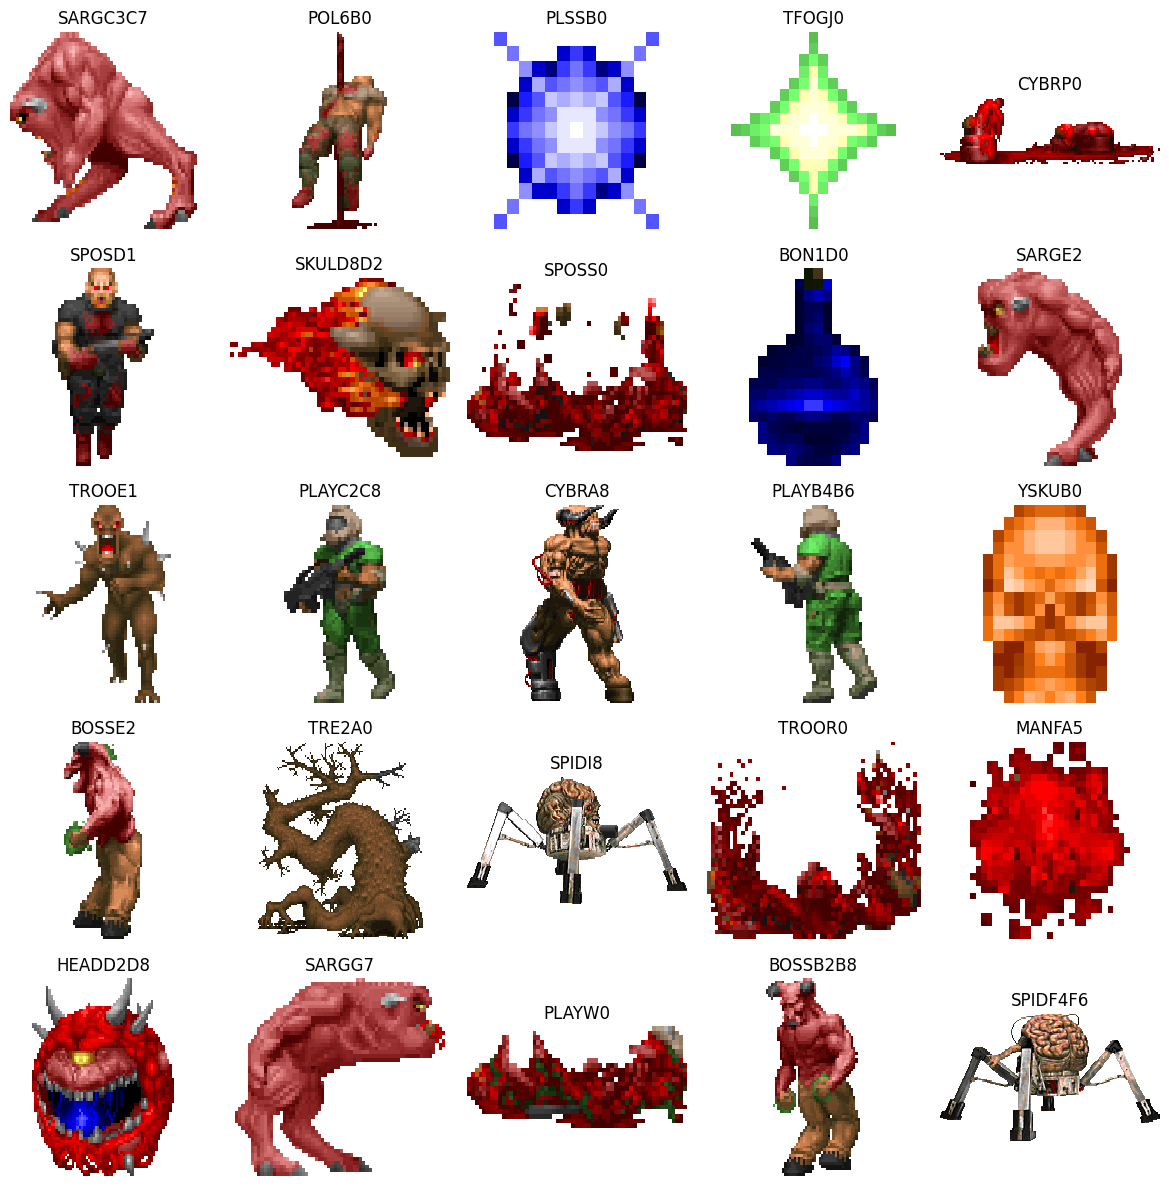

In [12]:
n_sprites = 25
fig, ax = plt.subplots(5, 5, figsize=(12, 12))
ax = ax.ravel()

all_sprite_names = list(w.sprites)
selected_sprites = np.random.choice(all_sprite_names, size=n_sprites, replace=False)

for i, sprite_name in enumerate(selected_sprites):

    viewer.draw_patch(sprite_name, ax=ax[i])
    ax[i].set_title(sprite_name)
    ax[i].axis('off')

fig.tight_layout(pad=1.2)

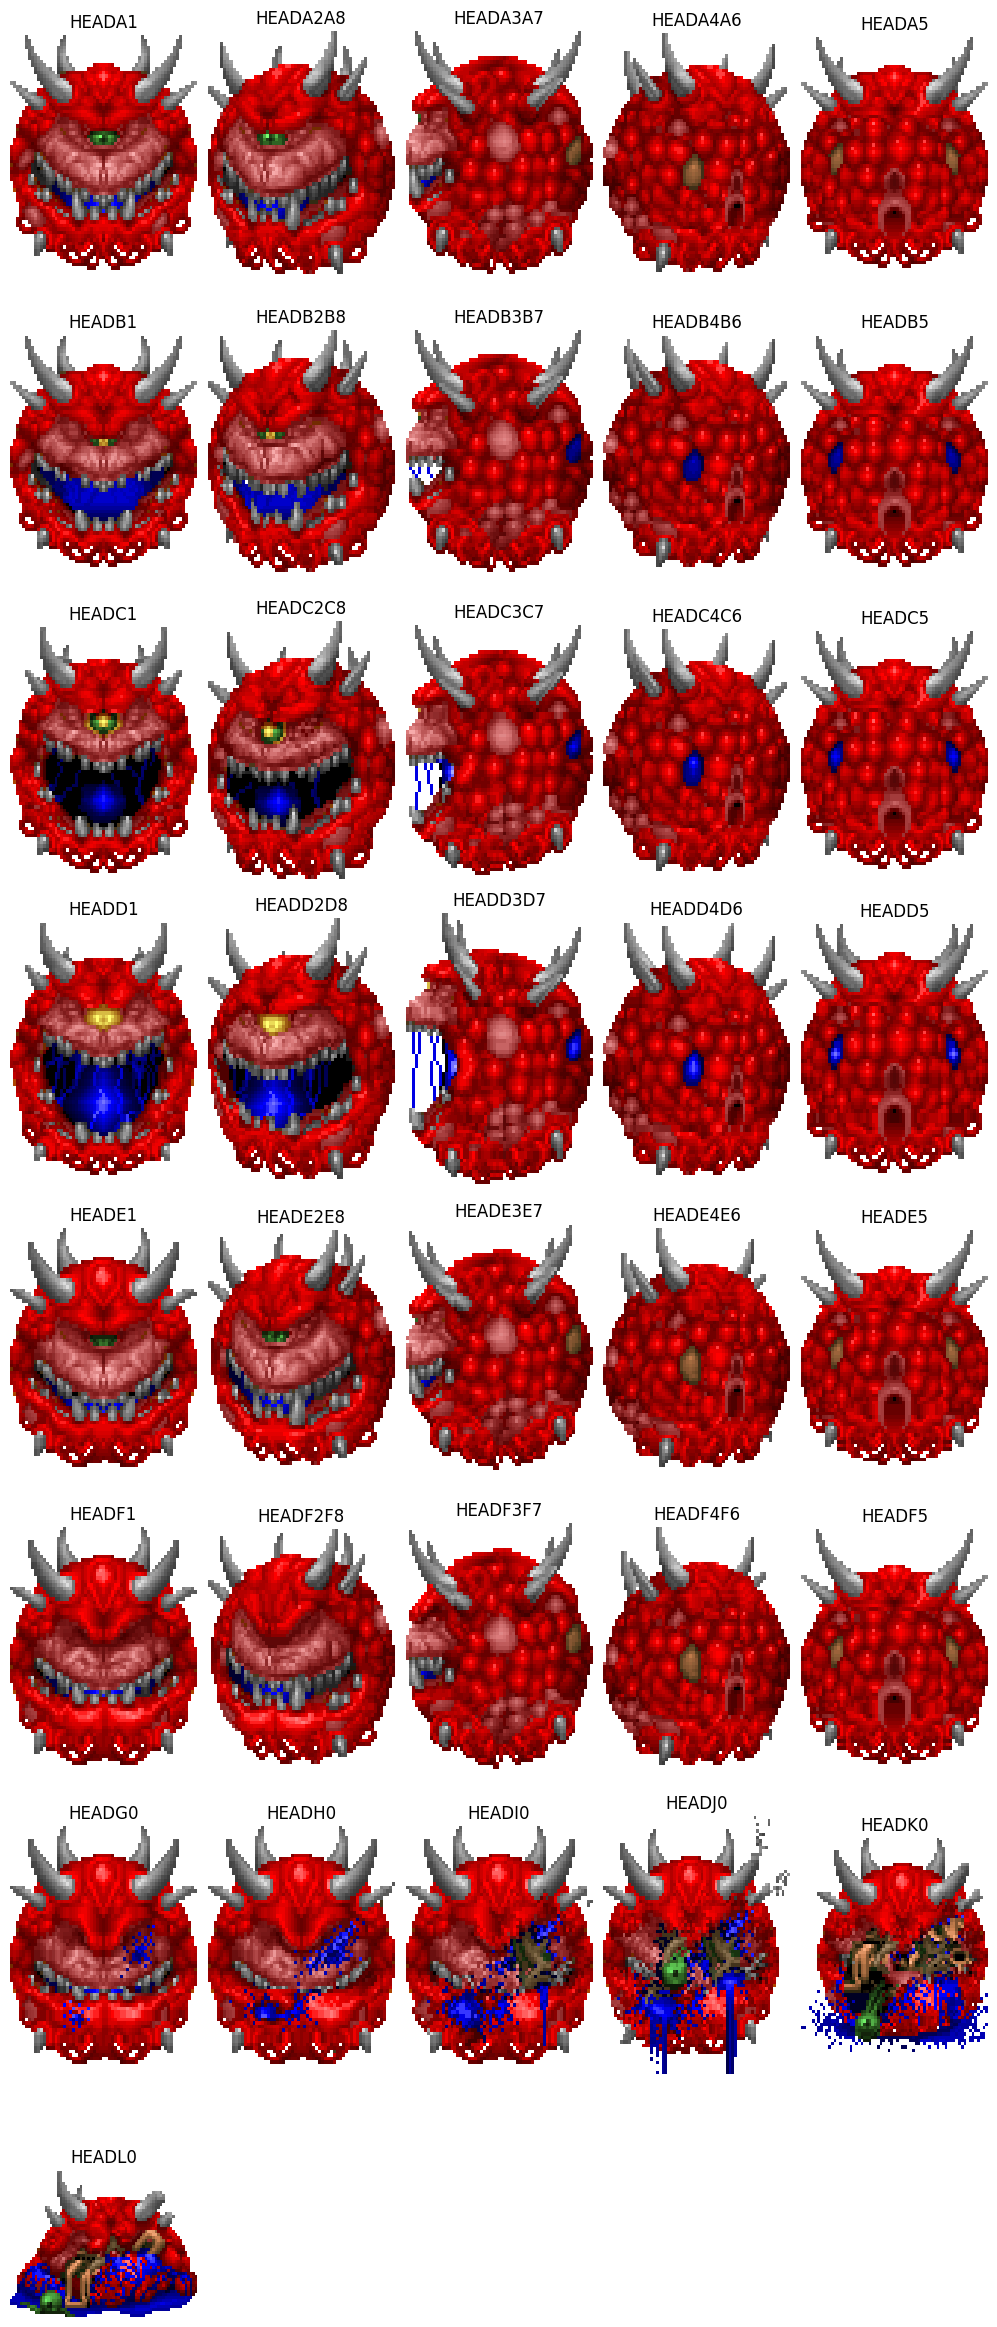

In [24]:
sprite_name = 'HEAD'

sprite_list = w.spritesheets[sprite_name]
ncols=5
nrows = int(np.ceil(len(sprite_list) / ncols))

fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(10, 3*nrows))
ax = ax.ravel()

for i, name in enumerate(sprite_list):
    
    viewer.draw_patch(name, ax=ax[i])
    ax[i].set_title(name)
    ax[i].axis('off')

[ax[i].set_visible(False) for i in range(len(sprite_list), len(ax))]
fig.tight_layout(pad=0.8)